**Problem 1** Consider the system

$$A =
\begin{bmatrix}
2 & -1 & 1 & 3\\
4 & 1 & 0 & 1\\
-2 & 5 & 3 & -1\\
1 & 0 & 2 & 4
\end{bmatrix}
$$

$$b =
\begin{bmatrix}
8\\
7\\
1\\
10\\
\end{bmatrix}$$

(a) Write program that performs LU factorization (without pivoting)

Importing all libraries

In [ ]:
#Importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [ ]:
A = np.array([
    [2, -1, 1, 3],
    [4, 1, 0, 1],
    [-2, 5, 3, -1],
    [1, 0, 2, 4],
])

m, n = A.shape

L = np.zeros((m, n))
U = np.zeros((m, n))

for row in range(n):
  # Creating the Upper Triangular Matrix U
  for k in range(row, n):
    D = 0.0
    for col in range(row):
      D = D + L[row][col] * U[col][k]
    U[row][k] = A[row][k] - D

  # Creating the Lower Triangular Matrix L
  for k in range(row, n):
    if row == k:
      L[row][row] = 1.0
    else:
      D = 0.0
      for col in range(row):
        D = D + L[k][col] * U[col][row]
      L[k][row] = (A[k][row] - D) / U[row][row]

Matrix_U = sp.Matrix(np.round(U, 4))
Matrix_L = sp.Matrix(np.round(L, 4))
print("Upper triangular matrix, U: \n")
display(Matrix_U)
print("Lower triangular matrix, U: \n")
display(Matrix_L)

Upper triangular matrix, U: 



Matrix([
[2.0, -1.0,    1.0,    3.0],
[0.0,  3.0,   -2.0,   -5.0],
[0.0,  0.0, 6.6667, 8.6667],
[0.0,  0.0,    0.0,   0.95]])

Lower triangular matrix, U: 



Matrix([
[ 1.0,    0.0,   0.0, 0.0],
[ 2.0,    1.0,   0.0, 0.0],
[-1.0, 1.3333,   1.0, 0.0],
[ 0.5, 0.1667, 0.275, 1.0]])

(b) Solve for $x$ using forward and backward substitution

In [ ]:
#Let y = UX, then we solve y first in Ly = b. The variable y can be solved using forward substitution

b = np.array([8, 7, 1, 10])

m = L.shape[0]
y = np.zeros((m,1))

b = b.reshape((m, 1))

#Forward Substitution Proper
for row in range(m):
  D = 0.0
  for col in range(row):
    D = D + L[row][col] * y[col][0]

  y[row][0] = (b[row][0] - D) / L[row][row]

Matrix_y = sp.Matrix(np.round(y, 4))
print("y is equal to \n")
display(Matrix_y)

y is equal to 



Matrix([
[  8.0],
[ -9.0],
[ 21.0],
[1.725]])

In [ ]:
#Since we have y, we can solve for x by backward substitution in Ux = y

b = y
m,n = U.shape
x = np.zeros((m,1))

#Backward Substitution Proper
for row in range(m - 1, -1, -1):
  D = 0.0
  for col in range(row + 1, m):
    D = D +  U[row][col] * x[col][0]
  x[row][0] = (b[row][0] - D) / U[row][row]


Matrix_x = sp.Matrix(np.round(x, 4))
print("x is equal to \n")
display(Matrix_x)

x is equal to 



Matrix([
[1.1579],
[0.5526],
[0.7895],
[1.8158]])

(c) Verify your solution by comparing with the direect solver output

In [ ]:
#Since Ax = b, then x = (A^-1) b. In python code this is just as follows
#Initialize
x = 0.0

A = np.array([
    [2, -1, 1, 3],
    [4, 1, 0, 1],
    [-2, 5, 3, -1],
    [1, 0, 2, 4],
])

b = np.array([8, 7, 1, 10])

rows, cols = A.shape

#Solving for x

x = np.linalg.solve(A,b.reshape(rows,1))

Matrix_x = sp.Matrix(np.round(x, 4))
print("x is equal to \n")
display(Matrix_x)

x is equal to 



Matrix([
[1.1579],
[0.5526],
[0.7895],
[1.8158]])

**Problem 2** Assume the quadratic model

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \varepsilon_i,
$$

with
$$
\beta_0 = 2, \quad \beta_1 = 1.5, \quad \beta_2 = 0.5.
$$

The following dataset is generated with small Gaussian noise
$
\varepsilon_i \sim \mathcal{N}(0, 0.05):
$

| $x_i$ | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|:-----:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| $y_i$ | 2.03 | 4.02 | 7.02 | 10.45 | 15.03 | 20.60 | 27.40 | 35.35 | 44.42 | 54.38 |


(a) Derive the normal equations for least squares solution

We start with $A\mathbf{x} = b$, If we can't find a solution to this system, we approxiate the solution by projecting $b$ into the column space of $A$. Let the this projection be $\hat{b}$, also $b^{\perp}$ be the component of $b$ perpendicular to the column space of A , then we have
$$
\hat{b} + b^{\perp} = b
$$
Next, we multiply both sides of this equation by $A^T$, and obtain
$$
A^T\hat{b} + A^Tb^{\perp} = A^Tb
$$
Observe that
$$(b^{\perp})^T A = 0$$
or
$$(A^Tb^{\perp})^T = 0$$
or
$$A^Tb^{\perp} = 0$$
Therefore, we get
$$
A^T\hat{b}  = A^Tb
$$
But we can write $\hat{b}$ as
$$
\hat{b}= A\hat{x}
$$
Which means that
$$
\boxed{A^TA\hat{x}  = A^Tb}
$$


In [ ]:
#Transforing the given data into matrix normal equations


#Generating Matrix A
m = 10
n = 3
#Creating blank mxn matrix
A = np.zeros((m,n))
b = np.array([2.03, 4.02, 7.02, 10.45, 15.03, 20.60, 27.40, 35.35, 44.42, 54.38])

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for r in range(10):
  A[r][0] = 1
  A[r][1] = (x[r])**1
  A[r][2] = (x[r])**2

#A^T A Matrix:
ATA = np.linalg.matmul(A.T, A)

#A^T b Matrix
ATb = np.linalg.matmul(A.T, b.reshape(10,1))

In [ ]:
#ATA Matrix
Matrix_ATA = sp.Matrix(ATA)
display(Matrix_ATA)

Matrix([
[ 10.0,   45.0,   285.0],
[ 45.0,  285.0,  2025.0],
[285.0, 2025.0, 15333.0]])

In [ ]:
#ATb Matrix
Matrix_ATb = sp.Matrix(ATb)
display(Matrix_ATb)

Matrix([
[   220.7],
[ 1469.16],
[10847.84]])

In [ ]:


#Displaying the normal equations using Sympy

#Decalring symbols Beta β1, β2, β3
β1, β2, β3 = sp.symbols('β0 β1 β2')
β = sp.Matrix([β1, β2, β3])
A = sp.Matrix(ATA)
b = sp.Matrix(ATb)

display(sp.Eq(A*β,b))

Eq(Matrix([
[     10.0*β0 + 45.0*β1 + 285.0*β2],
[   45.0*β0 + 285.0*β1 + 2025.0*β2],
[285.0*β0 + 2025.0*β1 + 15333.0*β2]]), Matrix([
[   220.7],
[ 1469.16],
[10847.84]]))

(b) Implement Cholesky's Factorization to solve the resulting equations

In [ ]:
#Choleksy Factorization
m, n = ATA.shape
L = np.zeros((m, n))

for rows in range(n):
      for col in range(rows + 1):
        D = 0.0
        for k in range(col):
          D = D + L[rows][k] * L[col][k]

        if rows == col:
          L[rows][col] = np.sqrt(ATA[rows][rows] - D)
        else:
          L[rows][col] = (ATA[rows][col] - D) / L[col][col]

Matrix_L = sp.Matrix(np.round(L, 4))
display(Matrix_L)

Matrix([
[ 3.1623,     0.0,     0.0],
[14.2302,   9.083,     0.0],
[90.1249, 81.7466, 22.9783]])

In [ ]:
#Solving by Forward Substitution Ly = b with y = L^T x
b = ATb
m = L.shape[0]
y = np.zeros((m,1))

#Forward Substitution Proper
for row in range(m):
  D = 0.0
  for col in range(row):
    D = D + L[row][col] * y[col][0]

  y[row][0] = (b[row][0] - D) / L[row][row]

Matrix_y = sp.Matrix(np.round(y, 4))
print("y is equal to \n")
display(Matrix_y)

y is equal to 



Matrix([
[69.7915],
[ 52.407],
[11.9156]])

In [ ]:
#Solving x using backward substitution using L^T x = y
b = y
U = L.T
m,n = U.shape
x = np.zeros((m,1))

#Backward Substitution Proper
for row in range(m - 1, -1, -1):
  D = 0.0
  for col in range(row + 1, m):
    D = D +  U[row][col] * x[col][0]
  x[row][0] = (b[row][0] - D) / U[row][row]

Beta = x
Matrix_Beta = sp.Matrix(np.round(Beta, 4))
print("Beta is equal to \n")
display(Matrix_Beta)

Beta is equal to 



Matrix([
[2.3285],
[1.1028],
[0.5186]])

In [ ]:
#Check using numpy linear algebra solver
x = np.linalg.solve(ATA, ATb.reshape(3,1))
Matx = np.round(x,4)
Matrix_x = sp.Matrix(Matx)
display(Matrix_x)

Matrix([
[2.3285],
[1.1028],
[0.5186]])

(c) Plot the observed data points $(x_i, y_i)$ and the fitted quadratic curve on the same graph


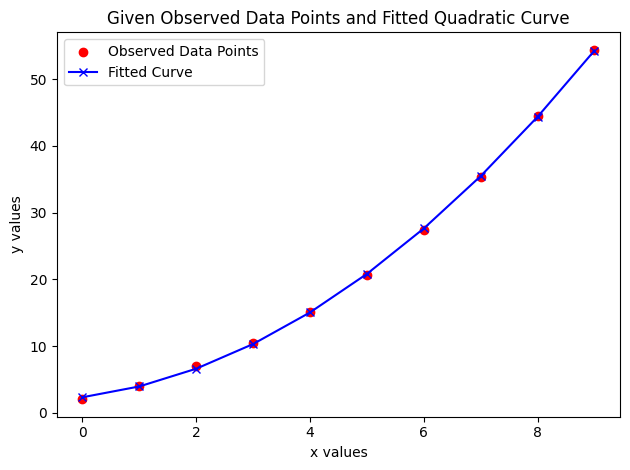

In [ ]:
# Observed Data Points
xi = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
yi = np.array([2.03, 4.02, 7.02, 10.45, 15.03, 20.60, 27.40, 35.35, 44.42, 54.38])

# Fitted Qudratic Curve
yf = Beta[0][0] + Beta[1][0]*xi + Beta[2][0]*(xi**2)

# Scatter plot of observed data points
plt.scatter(xi, yi, color='r', marker='o', label='Observed Data Points')

# Fitted Qudratic Curve Plot
plt.plot(xi, yf, color='b', marker='x', label='Fitted Curve')

plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Given Observed Data Points and Fitted Quadratic Curve')
plt.legend()
plt.tight_layout()
plt.savefig("output.pdf", bbox_inches="tight")
plt.show()

**Problem 3**
(a) Write your own code for QR factorization

In [ ]:
#QR Factorization function

def QRFactorization(A):
    m, n = A.shape

    # Creating blank mxn matrix
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    # QR Factorization

    # Initial Step
    R[0][0] = np.linalg.norm(A.T[0], ord=2)
    Q.T[0] = A.T[0] / R[0][0]

    # Iteration Step
    for col in range(1, n):
        for row in range(col):
            R[row][col] = np.linalg.matmul(Q.T[row], A.T[col])

        D = A.T[col]
        for row in range(col):
            D = D - R[row][col] * Q.T[row]

        R[col][col] = np.linalg.norm(D, ord=2)
        Q.T[col] = D / R[col][col]

    return Q, R

(b) For the matrix
$$A =
\begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 6 \\
1 & 1 & 0
\end{bmatrix}$$
use your QR factorization to determine its rank and nullity

In [ ]:
A = np.array([
    [1, 2, 3],
    [2, 4, 6],
    [1, 1, 0]
])
Q,R = QRFactorization(A)

Matrix_Q = sp.Matrix(np.round(Q, 4))
Matrix_R = sp.Matrix(np.round(R, 4))
print("Q Matrix is \n")
display(Matrix_Q)
print("\n")
print("R Matrix is \n")
display(Matrix_R)

Q Matrix is 



Matrix([
[0.4082,  0.1826,  0.2257],
[0.8165,  0.3651,  0.4513],
[0.4082, -0.9129, -0.8634]])



R Matrix is 



Matrix([
[2.4495, 4.4907, 6.1237],
[   0.0, 0.9129, 2.7386],
[   0.0,    0.0,    0.0]])

In [ ]:
#Checking for nonzero diagonals of R
diag_R = []
rank = 0
for r in range(R.shape[1]):
  if np.round(R[r][r],7) != 0:
    rank = rank + 1

Nullity = R.shape[1] - rank
print(f'The rank of A is Rank(A) = {rank} while its nullity is Nullity(A) = {Nullity}')

The rank of A is Rank(A) = 2 while its nullity is Nullity(A) = 1


**Problem 4**
Upload a grayscale image of your choice

In [ ]:
#Uploading the Image and converting it to grayscale
from PIL import Image

UploadedImage = Image.open('coffeepic.jpg')
Grayscale = UploadedImage.convert('L')

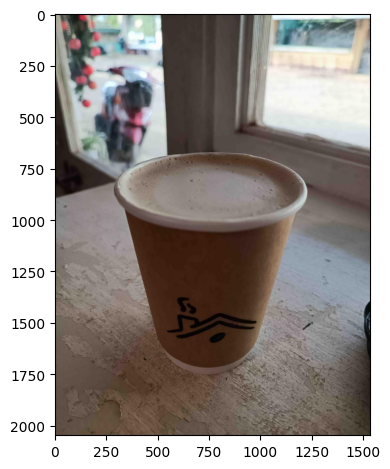

In [ ]:
#Colored Image
import matplotlib.pyplot as plt
plt.imshow(UploadedImage)
plt.tight_layout()
plt.savefig("output.pdf", bbox_inches="tight")
plt.show()

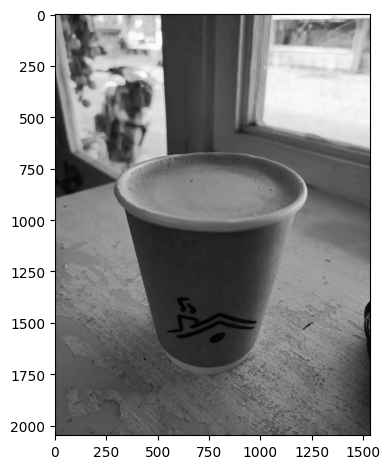

In [ ]:
#Grayscale Image
plt.imshow(Grayscale, cmap = 'gray')
plt.tight_layout()
plt.savefig("output.pdf", bbox_inches="tight")
plt.show()

(a) Compute the singular value decomposition $A = U\Sigma V^T$

In [ ]:
#Converting the grayscale image into a Matrix
A = np.array(Grayscale, dtype = float)

#Checking shape of the Numpy Converted Image Matrix
A.shape

(2048, 1536)

In [ ]:
#Decomposing into SVD Form
U, Sigma, VT = np.linalg.svd(A)

(b) Reconstruct the image using only the top $k$ singular values such that
$$
\frac{\sum_{i = 1}^{k} \sigma_i^2}{\sum_{i = 1}^{r} \sigma_i^2} \ge 0.85
$$

In [ ]:
Sigma2 = Sigma**2
Sigma2_Sum = 0
k = 0

for sigma in Sigma2:
  Sigma2_Sum = Sigma2_Sum + Sigma2[r]
  k = k + 1
  SigmaRatio = Sigma2_Sum/np.sum(Sigma2)
  if SigmaRatio >= 0.85:
    break

print(f"number of largest kth singular value(s) to be used is/are {k}")

number of largest kth singular value(s) to be used is/are 53


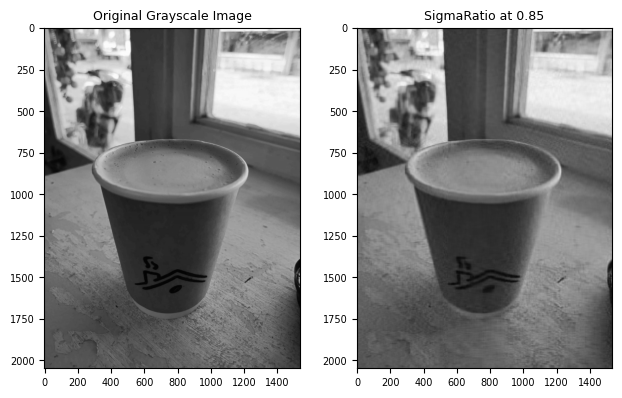

In [ ]:
#Reconstructing the image

Ak = np.linalg.matmul(U[:,:k]* Sigma[:k], VT[:k, :])

#Plotting the Grasycale image and the compressed Image in a subplot

plt.subplot(1,2,1)
plt.imshow(A, cmap = 'gray')
plt.title('Original Grayscale Image', fontsize = 9)
plt.tick_params(axis ='both', labelsize = 7)

plt.subplot(1,2,2)
plt.imshow(Ak, cmap = 'gray')
plt.title('SigmaRatio at 0.85', fontsize = 9)
plt.tick_params(axis ='both', labelsize = 7)

plt.subplots_adjust(wspace = 0.5)
plt.tight_layout()
plt.savefig("output.pdf", bbox_inches="tight")
plt.show()

**Problem 5** Consider the system

> Add blockquote


$$
\begin{bmatrix}
4 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 3
\end{bmatrix}x =
\begin{bmatrix}
15 \\
10 \\
10
\end{bmatrix}$$

<br>
(a) Solve using (i) Jacobi Method, (ii) Gauss - Seidel Method, and (iii) SOR Methods
<br><br>
(b) Determine the relaxation parameter $\omega$ that yields the fastest convergence


In [ ]:
#Checking if Matrix A in Ax = b is diagonally dominant
A = np.array([
    [4, -1, 0],
    [-1, 4, -1],
    [0, -1, 3]
])

b = np.array([
    [15],
    [10],
    [10]
])

domrow_count = 0
for row in range(3):
  row_sum = np.sum(np.delete(np.abs(A[row]), row))
  if A[row][row] > row_sum:
    domrow_count  = domrow_count + 1

if A.shape[0] == domrow_count:
  print("Matrix A is diagonally dominant")
else:
  print("Matrix A is not diagonally dominant")

Matrix A is diagonally dominant


In [ ]:
#Putting A and b into one Augmented Matrix

B = np.hstack((A,b), dtype = 'float')

for row in range(B.shape[0]):
  B[row, : ] =  B[row, : ]/B[row][row]

MatB = np.round(B,2)
Matrix_B = sp.Matrix(MatB)
display(Matrix_B)

Matrix([
[  1.0, -0.25,   0.0, 3.75],
[-0.25,   1.0, -0.25,  2.5],
[  0.0, -0.33,   1.0, 3.33]])

In [ ]:
# Jacobi Method

# Initialize variables
x_0before = 0
x_1before = 0
x_2before = 0
error_0 = 1.0
error_1 = 1.0
error_2 = 1.0
iteration = 0
tolerance = 1e-7

# Iteration loop
while max(error_0, error_1, error_2) > tolerance:
  iteration += 1

  x_0after = B[0][3] - (B[0][1]*x_1before + B[0][2]*x_2before)
  x_1after = B[1][3] - (B[1][0]*x_0before + B[1][2]*x_2before)
  x_2after = B[2][3] - (B[2][0]*x_0before + B[2][1]*x_1before)

  error_0 = abs(x_0after - x_0before)
  error_1 = abs(x_1after - x_1before)
  error_2 = abs(x_2after - x_2before)

  x_0before = x_0after
  x_1before = x_1after
  x_2before = x_2after

# Display results
print(f"Convergence occurred in {iteration} iterations.")
print(f"x0 = {x_0after:.4f}, x1 = {x_1after:.4f}, x2 = {x_2after:.4f}")

Convergence occurred in 20 iterations.
x0 = 5.0000, x1 = 5.0000, x2 = 5.0000


In [ ]:
# Gauss-Seidel Method

# Initialize variables
x_0before = 0
x_1before = 0
x_2before = 0
error_0 = 1.0
error_1 = 1.0
error_2 = 1.0
iteration = 0
tolerance = 1e-7

# Iteration loop
while max(error_0, error_1, error_2) > tolerance:
  iteration += 1

  x_0after = B[0][3] - B[0][1]*x_1before - B[0][2]*x_2before
  x_1after = B[1][3] - B[1][0]*x_0after - B[1][2]*x_2before
  x_2after = B[2][3] - B[2][0]*x_0after - B[2][1]*x_1after

  error_0 = abs(x_0after - x_0before)
  error_1 = abs(x_1after - x_1before)
  error_2 = abs(x_2after - x_2before)

  x_0before = x_0after
  x_1before = x_1after
  x_2before = x_2after

# Display results
print(f"Convergence occurred in {iteration} iterations.")
print(f"x0 = {x_0after:.4f}, x1 = {x_1after:.4f}, x2 = {x_2after:.4f}")

Convergence occurred in 11 iterations.
x0 = 5.0000, x1 = 5.0000, x2 = 5.0000


In [ ]:
# SOR Method

# Initialize variables
x_0before = 0
x_1before = 0
x_2before = 0
error_0 = 1.0
error_1 = 1.0
error_2 = 1.0
iteration = 0
w = 1.0533
tolerance = 1e-7

# Iteration loop
while max(error_0, error_1, error_2) > tolerance:
  iteration += 1

  x_0after = (1 - w)*x_0before + w*(B[0][3] - B[0][1]*x_1before - B[0][2]*x_2before)
  x_1after = (1 - w)*x_1before + w*(B[1][3] - B[1][0]*x_0after - B[1][2]*x_2before)
  x_2after = (1 - w)*x_2before + w*(B[2][3] - B[2][0]*x_0after - B[2][1]*x_1after)

  error_0 = abs(x_0after - x_0before)
  error_1 = abs(x_1after - x_1before)
  error_2 = abs(x_2after - x_2before)

  x_0before = x_0after
  x_1before = x_1after
  x_2before = x_2after


print(f"Convergence occurred in {iteration} iterations.")
print(f"x0 = {x_0after:.4f}, x1 = {x_1after:.4f}, x2 = {x_2after:.4f}")

Convergence occurred in 7 iterations.
x0 = 5.0000, x1 = 5.0000, x2 = 5.0000


(b) Determine the relaxtion parameter $\omega$ that yields the fastest convergence.

In [ ]:
def SORIteration_Number(A, b, w, tolerance):
  # Create augmented matrix
  B = np.hstack((A, b)).astype(float)

  # Normalize diagonals to 1
  for row in range(B.shape[0]):
        B[row, :] = B[row, :] / B[row][row]

  # Initialize variables
  x_0before = 0
  x_1before = 0
  x_2before = 0
  error_0 = 1.0
  error_1 = 1.0
  error_2 = 1.0
  iteration = 0

  # Iteration loop
  while max(error_0, error_1, error_2) > tolerance:
      iteration += 1

      x_0after = (1 - w) * x_0before + w * (B[0][3] - B[0][1]*x_1before - B[0][2]*x_2before)
      x_1after = (1 - w) * x_1before + w * (B[1][3] - B[1][0]*x_0after - B[1][2]*x_2before)
      x_2after = (1 - w) * x_2before + w * (B[2][3] - B[2][0]*x_0after - B[2][1]*x_1after)

      error_0 = abs(x_0after - x_0before)
      error_1 = abs(x_1after - x_1before)
      error_2 = abs(x_2after - x_2before)

      x_0before = x_0after
      x_1before = x_1after
      x_2before = x_2after

  return iteration

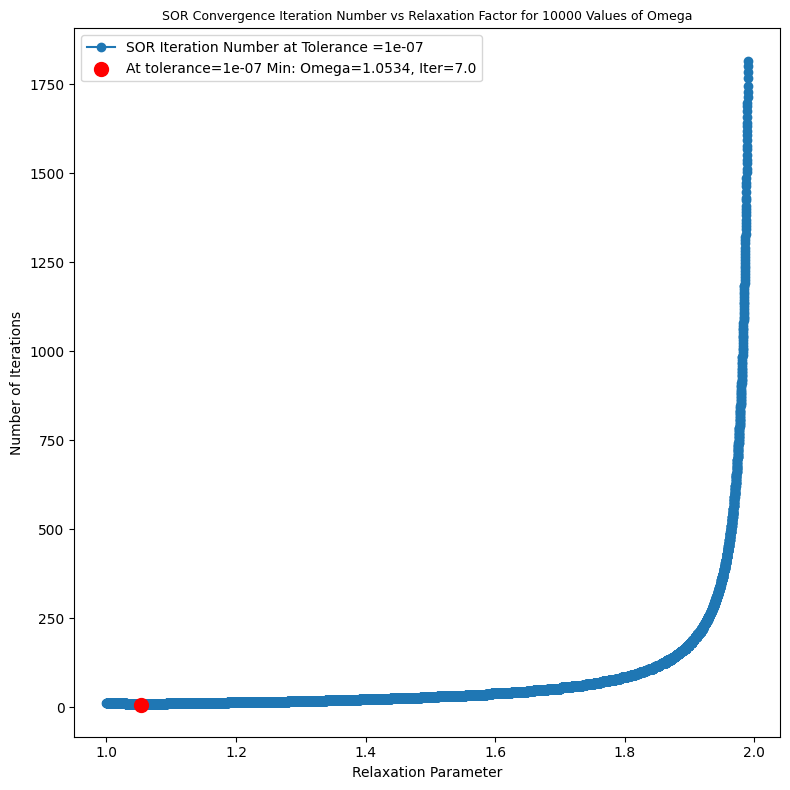

In [ ]:
#Determining the Optimum relaxation parameter Omega
A = np.array([
    [4, -1, 0],
    [-1, 4, -1],
    [0, -1, 3]
])

b = np.array([
    [15],
    [10],
    [10]
])


# Relaxation factors from 1.0 to 1.99 (10000 values)
n = 10000
omega = np.linspace(1.0, 1.99, n)
iterations = np.zeros(len(omega))

# Run SORIteration_Number function at a tolerance error for each omega
tolerance=1e-7
for n in range(len(omega)):
    iterations[n] = SORIteration_Number(A, b, omega[n], tolerance)

#Plotting Proper

# Finding the minimum iteration number
min_index = np.argmin(iterations)
min_omega = omega[min_index]
min_iter = iterations[min_index]

# Plotting Omega vs iterations using scatterplot
plt.figure(figsize=(8,8))
plt.plot(omega, iterations, marker='o', linestyle='-', label=f'SOR Iteration Number at Tolerance ={tolerance}')
plt.scatter(min_omega, min_iter, color='red', s=100, zorder=5, label=f'At tolerance={tolerance} Min: Omega={min_omega:.4f}, Iter={min_iter}')

# Labels
plt.title(f'SOR Convergence Iteration Number vs Relaxation Factor for {n+1} Values of Omega', fontsize = 9)
plt.xlabel('Relaxation Parameter')
plt.ylabel('Number of Iterations')
plt.legend()
plt.tight_layout()
plt.savefig("output.pdf", bbox_inches="tight")
plt.show()

**Problem 6** Let


$$A =
\begin{bmatrix}
 1 & \frac{1}{2} & \frac{1}{3} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5}
\end{bmatrix},    b  =
\begin{bmatrix}
1.0000 \\
0.8000 \\
0.6000
\end{bmatrix}$$
<br>
This Hilbert - like matrix is ill - conditioned. Introduce a small perturbation
$$\delta b =
\begin{bmatrix}
0.1 \\
-0.1 \\
0
\end{bmatrix}
,
b_{pert} = b + \delta b
$$
Compute the following
<br><br>
(a) the direct (unregularized) solutions
<br><br>
$$
x_{direct} = A^{-1} b ,  x_{direct}^{pert} = A^{-1} b_{pert}
$$
<br>

In [ ]:
#Importing important functions from numpy library
from numpy.linalg import solve, norm, inv, svd

In [ ]:
#Matrix A and b
A = np.array([
    [1, 1/2, 1/3],
    [1/2, 1/3, 1/4],
    [1/3, 1/4, 1/5]
])

b = np.array([
    [1.0000],
    [0.8000],
    [0.6000]
])

delta_b = np.array([
[0.1],
[-0.1],
[0]
])

b_pert = b + delta_b

In [ ]:
#(a) Solve for x_direct and x_direct_pert (unregularized solutions)
ATA = A.T @ A
I = np.identity(ATA.shape[0])

#Using np.linalg.inv
x_direct = inv(ATA)@(A.T @ b)
x_direct_pert = inv(ATA)@(A.T @ b_pert)

In [ ]:
#x_direct
Matrix_x_direct = sp.Matrix(np.round(x_direct,4))
display(Matrix_x_direct)

Matrix([
[-1.8],
[ 9.6],
[-6.0]])

In [ ]:
#x_direct_pert
Matrix_x_direct_pert = sp.Matrix(np.round(x_direct_pert,4))
display(Matrix_x_direct_pert)

Matrix([
[  2.7],
[-13.2],
[ 15.0]])

In [ ]:
#Check x_direct using np.linalg.solv
Matrix_S = sp.Matrix(np.round(solve(A,b),4))
display(Matrix_S)

Matrix([
[-1.8],
[ 9.6],
[-6.0]])

In [ ]:
#Check x_pert using np.linalg.solve
Matrix_Sp = sp.Matrix(np.round(solve(A,b_pert),4))
display(Matrix_Sp)

Matrix([
[  2.7],
[-13.2],
[ 15.0]])

(b) the Tikhonov - regularized solutions with fixed parameter $\lambda = 10^{-3}$
<br><br>

Using the closed form (in terms of matrices) of $x_\lambda$:

$$
x_\lambda = (A^T A + \lambda I)^{-1}A^T b
$$

In [ ]:
#(b) Solve for Tikhonov - regularized solutions with fixed parameter lambda = 1e-03
#Tikhonov Regularization
lamb= 1e-03
ATA = A.T@A
I = np.identity(ATA.shape[0])

#Using np.linalg.inv
x_lambda = inv(ATA + lamb*I)@(A.T @ b)
x_lambda_pert = inv(ATA + lamb*I)@(A.T @ b_pert)

In [ ]:
#x_lambda (regularized solution at lambda = 1e-03)
Matrix_x_lambda = sp.Matrix(np.round(x_lambda,4))
display(Matrix_x_lambda)

Matrix([
[-0.305],
[1.5818],
[1.5791]])

In [ ]:
#x_lambda_pert(regularized perturbed solution at lambda = 1e-03)
Matrix_x_lambda_pert = sp.Matrix(np.round(x_lambda_pert,4))
display(Matrix_x_lambda_pert)

Matrix([
[0.1965],
[0.9981],
[1.2072]])

Using the explicit form of $x_\lambda$ expressed as a sum:
$$
x_\lambda = \sum_{j=1}^{r} \frac{\sigma_j}{\lambda + \sigma_j ^2}(b^T u_j)v_j
$$

In [ ]:
#Using explicit for for x_lambda
# SVD Decomposition into reduced form
U, S, VT = np.linalg.svd(A, full_matrices=False)
r = np.linalg.matrix_rank(A)


lambd = 1e-3
x_lambda = 0

for j in range(r):
    x_lambda = x_lambda +  ( (S[j] / (lambd + S[j]**2)) * (b.T @ U[:,j]) ) * VT[j]

Matrix_x_lambda_2 = sp.Matrix(np.round(x_lambda.reshape(r,1),4))
display(Matrix_x_lambda_2)

Matrix([
[-0.305],
[1.5818],
[1.5791]])

In [ ]:
#Using explicit for for x_lambda for b_pert
# SVD Decomposition into reduced form
U, S, VT = np.linalg.svd(A, full_matrices=False)
r = np.linalg.matrix_rank(A)


lambd = 1e-3
x_lambda = 0

for j in range(r):
    x_lambda = x_lambda +   ( (S[j] / (lambd + S[j]**2)) * (b_pert.T @ U[:,j]) ) * VT[j]

Matrix_x_lambda_2p = sp.Matrix(np.round(x_lambda_pert.reshape(r,1),4))
display(Matrix_x_lambda_2p)

Matrix([
[0.1965],
[0.9981],
[1.2072]])

(c) For both direct and regularized cases, compute and report:
<br><br>
$$
\Delta _{direct} = ||x_{direct} - x_{direct}^{pert}||_2
\\
\Delta _{\lambda} = ||x_{\lambda} - x_{\lambda}^{pert}||_2
$$

In [ ]:
#Computing deltas of x_direct and x_lambda
#Using np.linalg.norm
delta_direct = norm(x_direct - x_direct_pert, ord = 2)
delta_lambda = norm(x_lambda - x_lambda_pert, ord = 2)

print(f"Delta_direct = {delta_direct:.4f}, Delta_lambda = {delta_lambda:.4f}")

Delta_direct = 31.3224, Delta_lambda = 1.3068


Tikhonov Regularization can be found in $\texttt{scikitlearn}$ library as Ridge Regression in $\texttt{sklearn.linear_model.Ridge}$

In [ ]:
 #Counterchecking x_lambda using Ridge function from scikitlearn
from sklearn.linear_model import Ridge

ridge_regress = Ridge(alpha=1e-3, fit_intercept = False)
ridge_regress.fit(A, b)
x_lambda = ridge_regress.coef_

Matrix_x_lambda_3 = sp.Matrix(np.round(x_lambda.reshape(A.shape[0],1),4))
display(Matrix_x_lambda_3)

Matrix([
[-0.305],
[1.5818],
[1.5791]])

In [ ]:
#Counterchecking x_lambda_pert using Ridge function from scikitlearn

ridge_regress = Ridge(alpha=1e-3, fit_intercept = False)
ridge_regress.fit(A, b_pert)
x_lambda_pert = ridge_regress.coef_
Matrix_x_lambda_4 = sp.Matrix(np.round(x_lambda_pert.reshape(A.shape[0],1),4))
display(Matrix_x_lambda_4)

Matrix([
[0.1965],
[0.9981],
[1.2072]])